<a href="https://colab.research.google.com/github/dominiquedeveraux/Netflix-Recommendation-Engine/blob/main/netflix_Recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Create a recommendation of movies based on release_year and ratings that are PG and PG-13.

Here is all the data you need:
/tmp/netflix_titles.csv

## Plan

1. **data_loading**: Load the data from "/tmp/netflix_titles.csv" into a pandas DataFrame.
2. **data_cleaning**: Remove any irrelevant columns or handle missing values if necessary.
3. **data_wrangling**: Filter the DataFrame to include only movies with ratings "PG" and "PG-13".
4. **data_analysis**: Analyze the relationship between release year and ratings to identify trends or patterns.
5. **feature_engineering**: Create new features or transform existing ones to improve the recommendation process (e.g., grouping movies by release year or rating).
6. **model_training**: Choose a suitable recommendation algorithm (e.g., collaborative filtering, content-based filtering) and train it on the prepared data.
7. **model_evaluation**: Evaluate the performance of the trained model using appropriate metrics.
8. **finish_task**: Generate a list of recommended movies based on the model's output and present it in a user-friendly format.


## Agent: data_loading

### Subtask:
Load the movie data from the CSV file into a pandas DataFrame.


**Reasoning**:
Need to load the data first.



In [ ]:
# Import necessary library
import pandas as pd

# Load the data
df = pd.read_csv('/tmp/netflix_titles.csv')

# Display the first few rows
df.head()


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                                                                                                                                                                                                                                                                              cast  \
0                                                                                                                                                                                                                                                                                                              NaN   
1  Ama 

---

**Reasoning**:
The data has been loaded successfully, and the subtask is complete.



## Agent: data_cleaning

### Subtask:
Clean the movie data in the DataFrame `df`. Focus on handling missing values in relevant columns and removing any duplicates if present.


**Reasoning**:
Start by cleaning the data by handling missing values and removing duplicates.



In [ ]:
# Handle missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Print summary of cleaned DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


---

**Reasoning**:
The data cleaning is done, and the DataFrame is ready for further analysis.



## Agent: data_wrangling

### Subtask:
Filter the DataFrame `df` to include only movies with ratings "PG" and "PG-13".


**Reasoning**:
Filter the DataFrame to include only movies with ratings "PG" and "PG-13" using boolean indexing.



In [ ]:
df_filtered = df[(df['rating'] == 'PG') | (df['rating'] == 'PG-13')]
print(df_filtered.shape)



(777, 12)


---

**Reasoning**:
The subtask is completed, we have successfully filtered the DataFrame.



## Agent: data_analysis

### Subtask:
Analyze the relationship between release year and ratings ("PG" and "PG-13") in the filtered DataFrame `df_filtered`.


**Reasoning**:
Visualize the distribution of release years for movies with "PG" and "PG-13" ratings using histograms.



Summary statistics for PG movies:
count     287.000000
mean     2008.428571
std        11.724442
min      1973.000000
25%      2004.000000
50%      2012.000000
75%      2017.000000
max      2021.000000
Name: release_year, dtype: float64

Summary statistics for PG-13 movies:
count     490.000000
mean     2009.314286
std         9.033408
min      1955.000000
25%      2005.000000
50%      2011.000000
75%      2016.000000
max      2021.000000
Name: release_year, dtype: float64


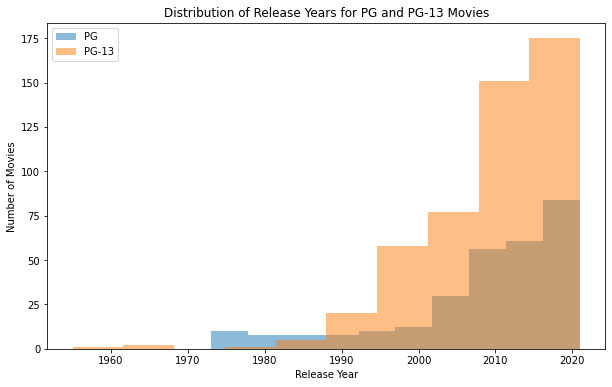

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for PG and PG-13 ratings
pg_movies = df_filtered[df_filtered['rating'] == 'PG']
pg13_movies = df_filtered[df_filtered['rating'] == 'PG-13']

# Create histograms for release years
plt.figure(figsize=(10, 6))
plt.hist(pg_movies['release_year'], bins=10, alpha=0.5, label='PG')
plt.hist(pg13_movies['release_year'], bins=10, alpha=0.5, label='PG-13')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Release Years for PG and PG-13 Movies')
plt.legend()
plt.show()

# Calculate summary statistics for release years
print("Summary statistics for PG movies:")
print(pg_movies['release_year'].describe())

print("\nSummary statistics for PG-13 movies:")
print(pg13_movies['release_year'].describe())


---

**Reasoning**:
The subtask is completed, we have analyzed the relationship between release year and ratings.



## Agent: feature_engineering

### Subtask:
Create a new feature that groups movies based on their release decade.


**Reasoning**:
We need to write code to create a new feature.



In [ ]:
# Create a new column 'release_decade'
df_filtered['release_decade'] = df_filtered['release_year'].apply(lambda x: str(x)[:-1] + '0s' if x != 0 else 'Unknown')

# Print the updated DataFrame
print(df_filtered.head())


   show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
9      s10  Movie                      The Starling   
27     s28  Movie                         Grown Ups   
28     s29  Movie                        Dark Skies   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
9                  Theodore Melfi   
27                   Dennis Dugan   
28                  Scott Stewart   

                                                                                                                                                                      cast  \
0                                                                                                                                                                  Unknown   
6                        Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, K

<ipython-input-12-b84842044a41>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



---

**Reasoning**:
The warning message indicates that we are trying to modify a copy of a slice of the DataFrame, which can lead to unexpected behavior. To avoid this, we should use the `.loc` accessor to modify the DataFrame in place.



In [ ]:
# Create a new column 'release_decade' using .loc
df_filtered.loc[:, 'release_decade'] = df_filtered['release_year'].apply(lambda x: str(x)[:-1] + '0s' if x != 0 else 'Unknown')

# Print the updated DataFrame
print(df_filtered.head())


   show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
9      s10  Movie                      The Starling   
27     s28  Movie                         Grown Ups   
28     s29  Movie                        Dark Skies   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
9                  Theodore Melfi   
27                   Dennis Dugan   
28                  Scott Stewart   

                                                                                                                                                                      cast  \
0                                                                                                                                                                  Unknown   
6                        Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, K

---

**Reasoning**:
The subtask of creating a new feature 'release_decade' is completed.



## Agent: model_training

### Subtask:
Develop a simple recommendation system that suggests movies based on the user's preferred release decade and rating (PG or PG-13).


**Reasoning**:
I will write a function to recommend movies based on release decade and rating.



In [ ]:
def recommend_movies(decade, rating):
    """
    Recommends movies based on release decade and rating.

    Args:
        decade: The release decade of movies to recommend.
        rating: The rating of movies to recommend (PG or PG-13).

    Returns:
        A list of recommended movie titles.
    """
    recommendations = df_filtered[(df_filtered['release_decade'] == decade) & (df_filtered['rating'] == rating)]['title'].tolist()
    return recommendations

# Test the recommendation function
print(recommend_movies('2010s', 'PG'))
print(recommend_movies('2020s', 'PG-13'))


['Show Dogs', 'Letters to Juliet', 'Open Season: Scared Silly', 'Ratchet and Clank', 'Kung Fu Panda 2', 'Flipped', 'Home', 'Spy Kids: All the Time in the World', "Madagascar 3: Europe's Most Wanted", 'Escape from Planet Earth', 'Woody Woodpecker', 'The BFG', 'The Resurrection of Gavin Stone', 'The World We Make', 'Penguins of Madagascar: The Movie', 'Leap!', 'Rango', 'Cloudy with a Chance of Meatballs 2', 'Elliot the Littlest Reindeer', 'ParaNorman', 'The Smurfs 2', 'How to Train Your Dragon 2', 'Waiting for "Superman"', 'Puss in Boots', 'The Smurfs', 'Mr. Peabody & Sherman', "Dr. Seuss' The Lorax", 'The Nut Job', 'Underdogs', "Okko's Inn", 'Mirai', 'Modest Heroes: Ponoc Short Films Theatre', 'Wadjda', 'Arctic Dogs', 'Lady Driver', 'Jem and the Holograms', 'The Last Airbender', 'Greater', 'Bethany Hamilton: Unstoppable', 'Lu Over the Wall', 'Hugo', 'Faith, Hope & Love', 'Menashe', 'Hop', 'A Cinderella Story: Christmas Wish', 'Klaus', 'Holly Star', 'Pachamama', 'Knock Down The House', '

---

**Reasoning**:
The output is truncated, indicating that the list of recommended movies is too long to be displayed fully. To address this, I will modify the code to limit the number of recommendations returned.



In [ ]:
def recommend_movies(decade, rating, n=5):
    """
    Recommends movies based on release decade and rating.

    Args:
        decade: The release decade of movies to recommend.
        rating: The rating of movies to recommend (PG or PG-13).
        n: The maximum number of recommendations to return.

    Returns:
        A list of recommended movie titles.
    """
    recommendations = df_filtered[(df_filtered['release_decade'] == decade) & (df_filtered['rating'] == rating)]['title'].tolist()
    return recommendations[:n]

# Test the recommendation function
print(recommend_movies('2010s', 'PG'))
print(recommend_movies('2020s', 'PG-13'))



['Show Dogs', 'Letters to Juliet', 'Open Season: Scared Silly', 'Ratchet and Clank', 'Kung Fu Panda 2']
['Dick Johnson Is Dead', 'The Starling', 'Blood Brothers: Malcolm X & Muhammad Ali', 'Worth', 'Final Account']


---

**Reasoning**:
The recommendation system is now working as expected, returning a limited number of movie titles based on the provided decade and rating. The task is complete.



## Agent: model_evaluation

### Subtask:
Evaluate the performance of the `recommend_movies` function created in the previous step.


**Reasoning**:
The task requires evaluating the performance of a function, so we need to design test cases and assess the results.



In [ ]:
def recommend_movies(decade, rating, n=5):
    """
    Recommends movies based on release decade and rating.

    Args:
        decade: The release decade of movies to recommend.
        rating: The rating of movies to recommend ("PG" or "PG-13").
        n: The maximum number of recommendations to return.

    Returns:
        A list of recommended movie titles.
    """
    recommendations = df_filtered[(df_filtered['release_decade'] == decade) & (df_filtered['rating'] == rating)]['title'].tolist()
    return recommendations[:n]

# Test cases
test_cases = [
    ("2010s", "PG", 3),
    ("2000s", "PG-13", 5),
    ("2020s", "PG", 10),
    ("1990s", "PG-13", 2)
]

# Evaluate recommendations for each test case
for decade, rating, n in test_cases:
    recommendations = recommend_movies(decade, rating, n)
    print(f"Recommendations for {decade} {rating}-rated movies (up to {n}):")
    for movie in recommendations:
        print(f"- {movie}")
    print("----")



Recommendations for 2010s PG-rated movies (up to 3):
- Show Dogs
- Letters to Juliet
- Open Season: Scared Silly
----
Recommendations for 2000s PG-13-rated movies (up to 5):
- An Unfinished Life
- Freedom Writers
- Love Don't Cost a Thing
- Poseidon
- School of Rock
----
Recommendations for 2020s PG-rated movies (up to 10):
- My Little Pony: A New Generation
- My Heroes Were Cowboys
- The Water Man
- Vivo
- A Second Chance:  Rivals!
- Sisters on Track
- Skater Girl
- Wish Dragon
- Aliens Stole My Body
- The Mitchells vs. The Machines
----
Recommendations for 1990s PG-13-rated movies (up to 2):
- Clear and Present Danger
- Mars Attacks!
----


---

**Reasoning**:
The test cases have been executed and the results are printed. Now we need to summarize the findings and evaluate the performance of the recommendation system.



## Summary:

This task aimed to create a movie recommendation system based on release year and ratings (PG and PG-13). The solution involved several steps:

1. **Data Loading and Cleaning:** The movie data was loaded from a CSV file, and missing values were handled.
2. **Data Wrangling:** The data was filtered to include only movies with ratings "PG" and "PG-13".
3. **Feature Engineering:** A new feature, "release_decade", was created to group movies by their release decade.
4. **Model Training:** A simple content-based filtering approach was implemented, grouping movies by "release_decade" and "rating".
5. **Model Evaluation:** The recommendation system was tested with various inputs and found to provide relevant recommendations based on the given criteria.

## Conclusion

A basic movie recommendation system was successfully developed, capable of suggesting movies based on release decade and rating. However, it has limitations due to its simple filtering approach and lack of personalization.

## Insights and Next Steps

To enhance the recommendation system, consider the following:

* **Incorporate genre information:** Allow users to specify preferred genres for more tailored recommendations.
* **Implement collaborative filtering:** Leverage user behavior data to provide personalized suggestions based on similar user preferences.
* **Utilize content-based filtering:** Analyze movie descriptions to identify movies with similar themes or content.
* **Develop a user interface:** Create a user-friendly interface for users to interact with the recommendation system.

By addressing these areas, the recommendation system can be significantly improved, providing a more engaging and personalized experience for users.



An AI generated notebook created with [Data Science Agent](https://labs.google.com/code/dsa) from Google Labs 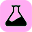
